In [27]:
using Turing, Distributions
using ForwardDiff: Dual
using PyPlot, PyCall

In [28]:
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);
K = 3;

In [29]:
@model BayesHmm(y) = begin
    s = tzeros(Int64, N)
    m = tzeros(Dual, K)
    T = Array{Array}(K)
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
        m[i] ~ Normal(i, 0.01)
    end
    s[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.01)
    end
    return(s, m)
end

[Turing]: Assume - `T` is a parameter
[Turing]: Assume - `m` is a parameter (ignoring `m` found in global scope)
[Turing]: Assume - `s` is a parameter (ignoring `s` found in global scope)
[Turing]: Observe - `y` is an observation


BayesHmm2 (generic function with 4 methods)

In [30]:
g = Gibbs(300, HMC(1, 0.2, 5, :m, :T), PG(50, 1, :s))
c = @sample(BayesHmm(y), g);

[Gibbs]: Finshed within 49.14320993423462 seconds


In [31]:
s = MambaChains(c);

In [32]:
describe(s)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
             Mean                  SD                        Naive SE                      MCSE               ESS   
   m[1] 3.01234739567 0.0000000000000022241560703 0.000000000000000128411710591 0.00000000000000000000000 300.000000
   m[2] 2.01470907511 0.0000000000000004448312141 0.000000000000000025682342118 0.00000000000000000000000 300.000000
   m[3] 0.99627455855 0.0000000000000008896624281 0.000000000000000051364684236 0.00000000000000000000000 300.000000
T[1][1] 0.37583866622 0.0000000000000001112078035 0.000000000000000006420585530 0.00000000000000003925231   8.026756
T[1][2] 0.01214527943 0.0000000000000000208514632 0.000000000000000001203859787 0.00000000000000000000000 300.000000
T[1][3] 0.61201605435 0.0000000000000004448312141 0.000000000000000025682342118 0.00000000000000000000000 300.000000
T[2][1] 0.00031187386 0.0000000000000000003801048 0.000000000000000000021

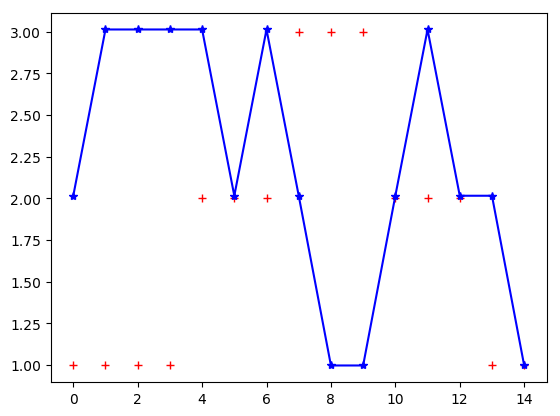

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3273d04d0>

In [34]:
m = c[:m][111];
s = c[:s][111];
PyPlot.plot(y, linestyle="None", marker="+", color = "r")
PyPlot.plot(m[s], linestyle="-", marker="*", color = "b")